In [5]:
'''
A和B两代生成分子，一前一后
统计B分子与A分子的相似性，并排序取前几个，
并作相似性图
'''
from test_fp_similarity import Similarity_heatmap,Similarity_molMap
import numpy as np
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt

In [79]:
#相似性计算，作图
class similarity_plots():
    def __init__(self,smi_list_A,smi_list_B):
        self.smi_list_A = smi_list_A
        self.smi_list_B = smi_list_B
        self.select_fp_type ='Morgan'
        self.select_Similarity_index=0
        self.radius=2
        self.fpSize=2048
        self.fp_type=0
        self.smilarity_type=6
        self.size=(250, 250)
        self.save_root = "F:\\manuscript3\\中文期刊\\相似性figs"
        self.dpi=600

        self.similarity_matrix = Similarity_heatmap(self.smi_list_A,
                                     self.smi_list_B,
                                    select_fp_type =self.select_fp_type,
                                    select_Similarity_index=self.select_Similarity_index,
                                    radius=self.radius, fpSize=self.fpSize)
        self.similarity_matrix.to_csv(self.save_root+"\\similarity_matrix.csv")

    def draw_similarity(self, prefix= ""): # 画图且保存
        mol_list_A = [Chem.MolFromSmiles(x) for x in self.smi_list_A]
        mol_list_B = [Chem.MolFromSmiles(x) for x in self.smi_list_B]
        i = 1
        for a in mol_list_A:
            j  = 1
            for b in mol_list_B:
                self.fig = Similarity_molMap(a,b,fp_type=0,
                                        smilarity_type=6,
                                        size=(250, 250))
                self.fig.savefig(self.save_root+"\\"+prefix+str(i)+"-"+str(j)+".png",
                            dpi=self.dpi,
                            bbox_inches = 'tight')
                j += 1
            i += 1

In [82]:
#抽取分子

##读入初始的 A 和 B
Gen = 2 # 计算的代数 1 2
save_root="F:\\manuscript3\\中文期刊\\相似性figs\\"
read_root= "F:\\WORK\\和外合作\\天宇媛媛毕设\\generate\\result2\\"
A_path = read_root+"gen"+str(Gen-1)+"\\"
B_path = read_root+"gen"+str(Gen)+"\\"
B_csv = pd.read_csv(B_path+"final_new_mols.csv")
B_len,_ = B_csv.shape
B_mols = B_csv.iloc[[0,int(B_len/2),B_len-1]]
A_csv = pd.read_csv(A_path+"selected_mols.csv")
A_SMILES = A_csv["SMILES"]

##根据相似性，为每个B筛选A
As_b_dict = {} # 每个b前三个相似的分子a
for b in B_mols["SMILES"]:
    run = similarity_plots(A_SMILES, [b])
    mat = run.similarity_matrix

    mat_sort = mat.sort_values(by=b,ascending=False)
    As_b_dict[b] = mat_sort.head(5).index.to_list()
As_b_dict = pd.DataFrame(As_b_dict)
As_b_dict.to_csv(save_root+"gen_"+str(Gen)+"_As_b_dict.csv")

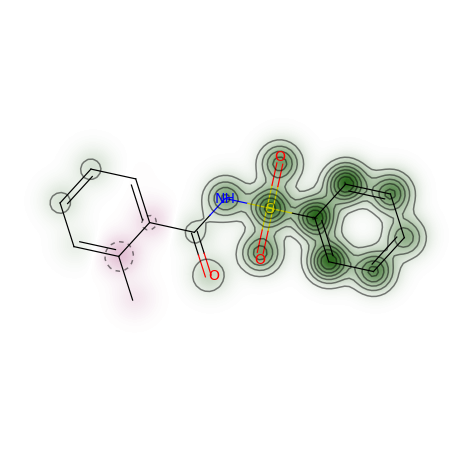

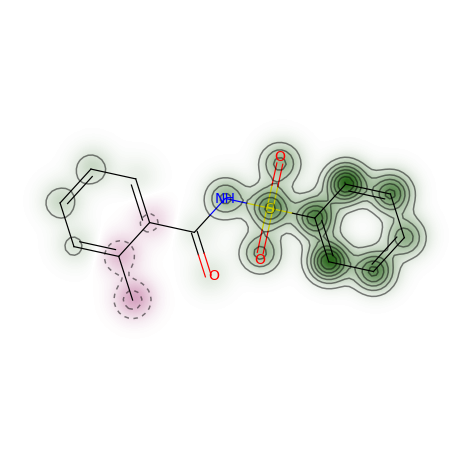

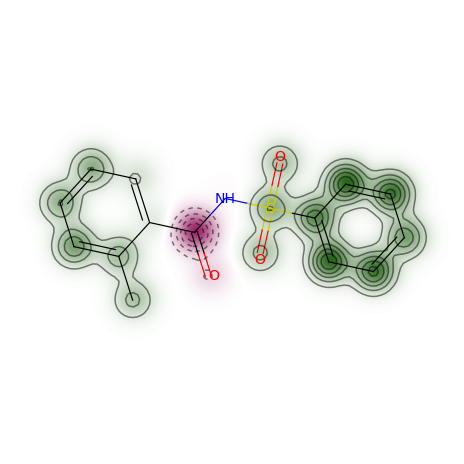

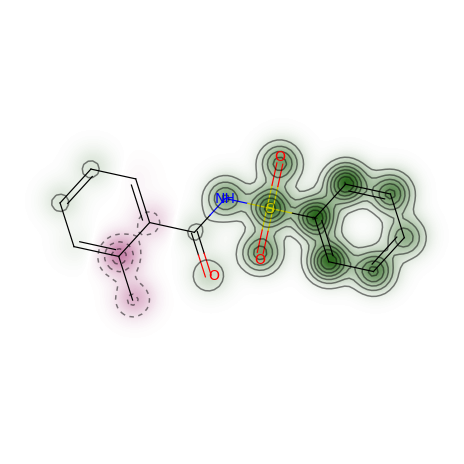

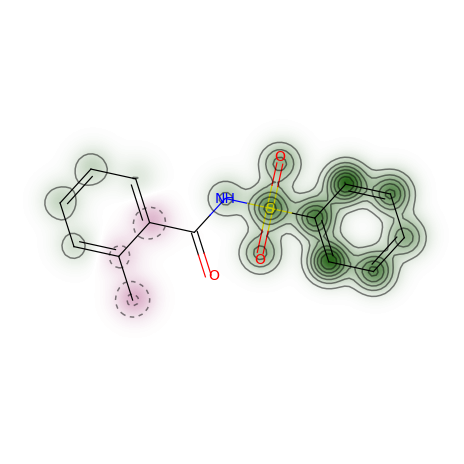

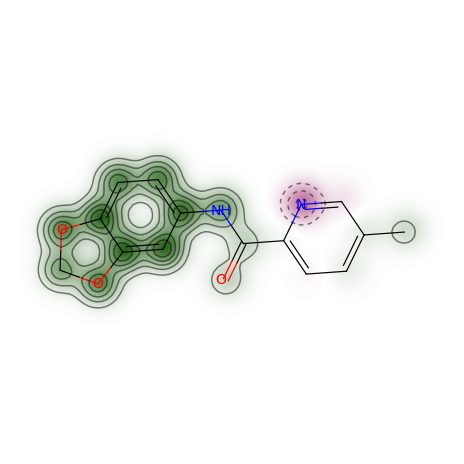

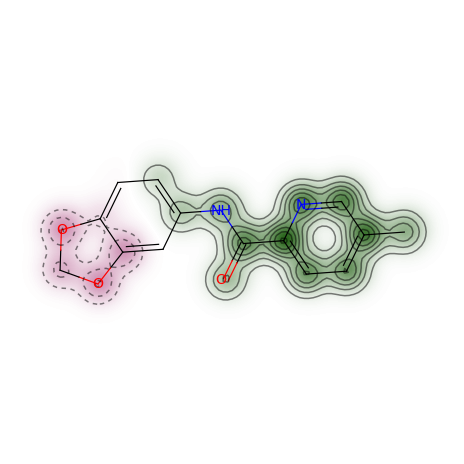

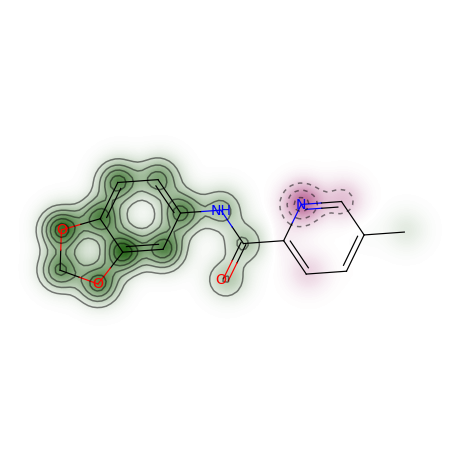

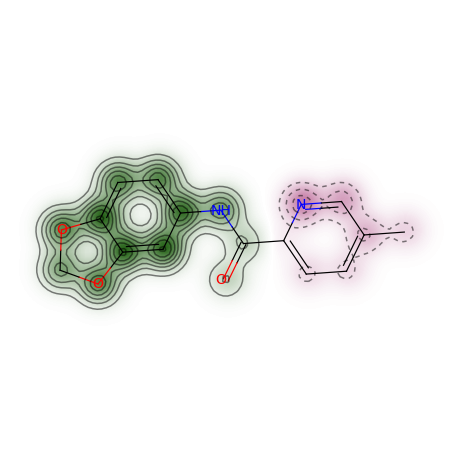

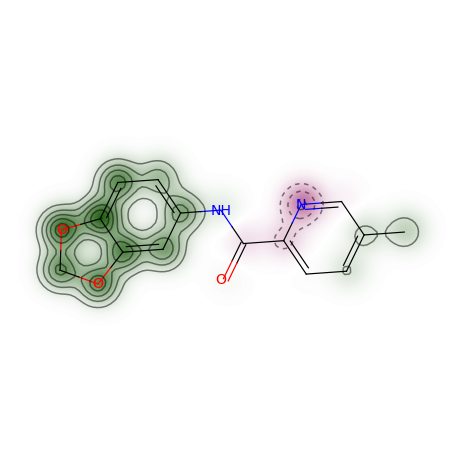

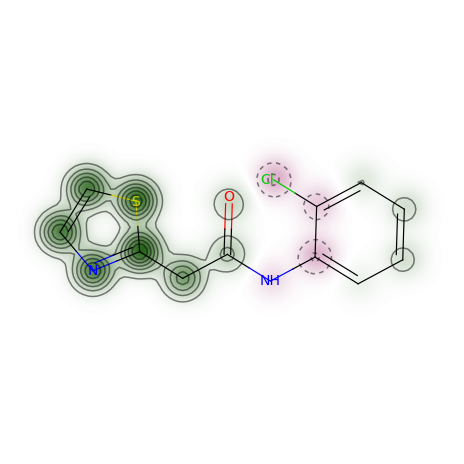

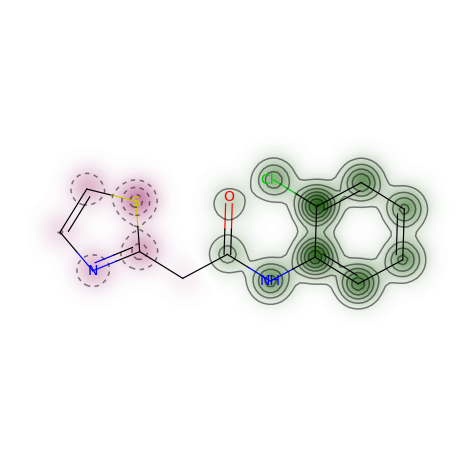

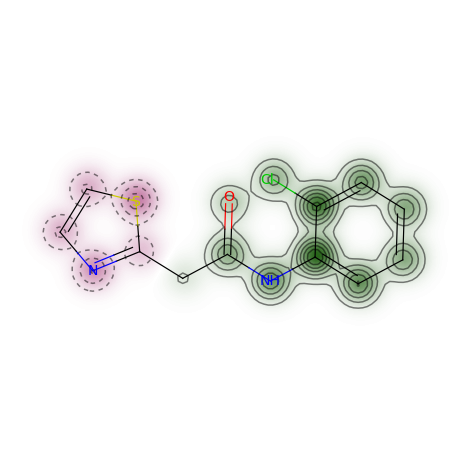

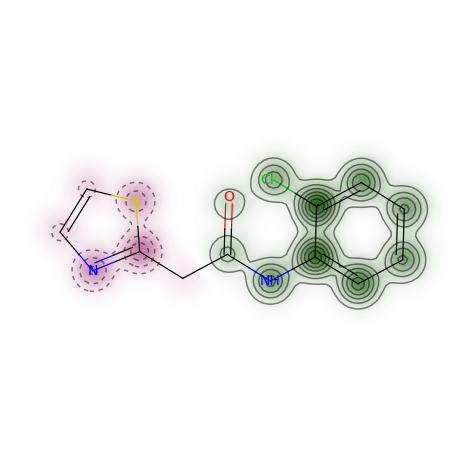

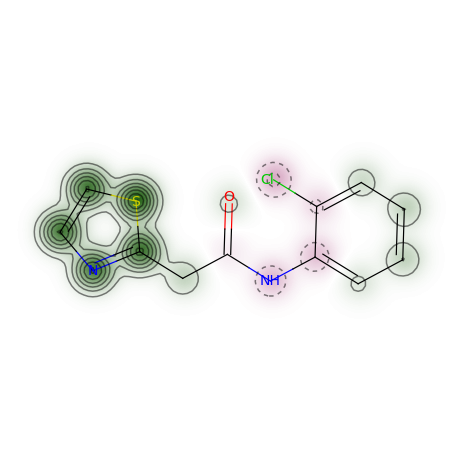

In [83]:
#根据筛选的A，制图，统计

## 相似性
similarity_dict={}
i=0
for b in B_mols["SMILES"]:
    A_list = As_b_dict[b]
    run = similarity_plots(A_list, [b])
    mat = run.similarity_matrix
    similarity_dict[b] = mat[b].values
    run.draw_similarity(prefix="gen_"+str(Gen)+"_b"+str(i)+"_")
    i += 1
similarity_dict = pd.DataFrame(similarity_dict)
similarity_dict.to_csv(save_root+"gen_"+str(Gen)+"_As_b_similarity_dict.csv")



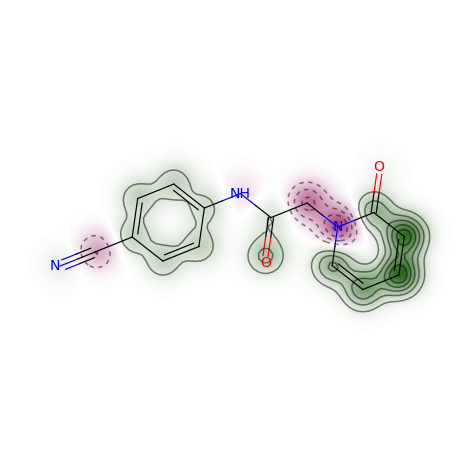

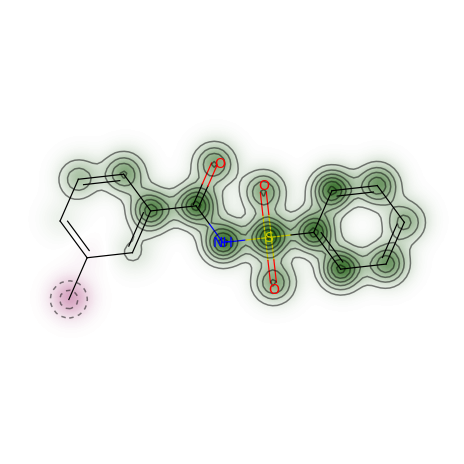

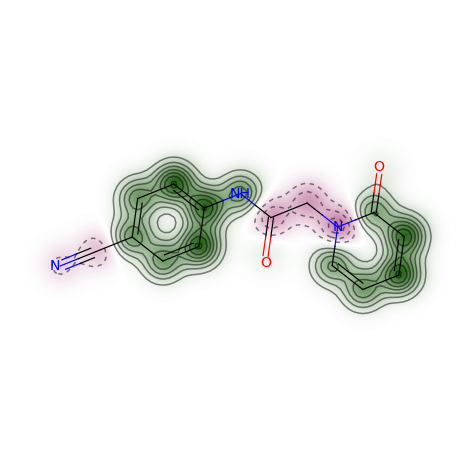

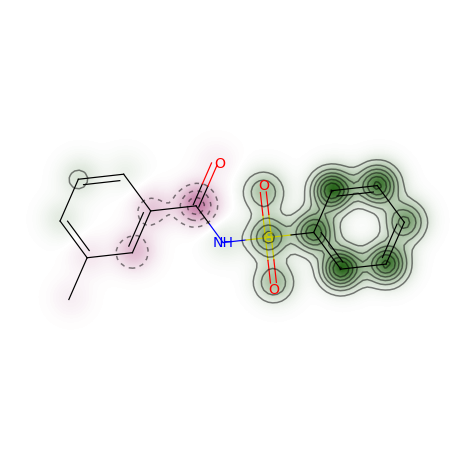

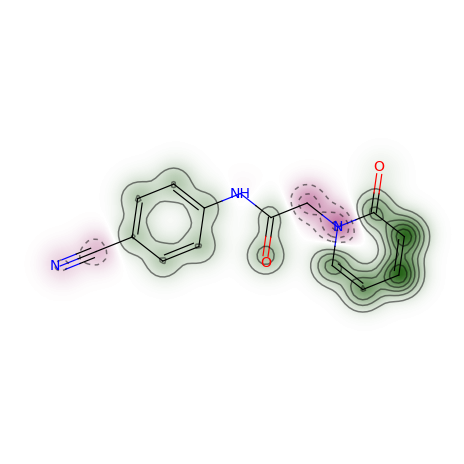

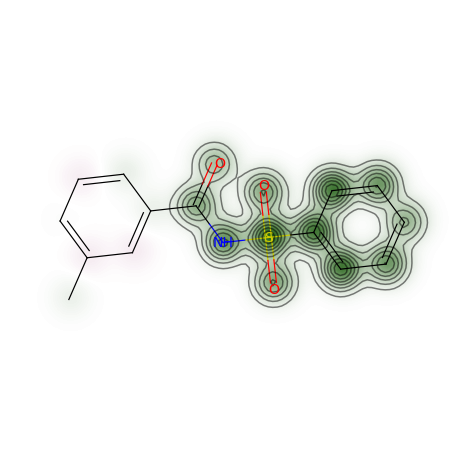

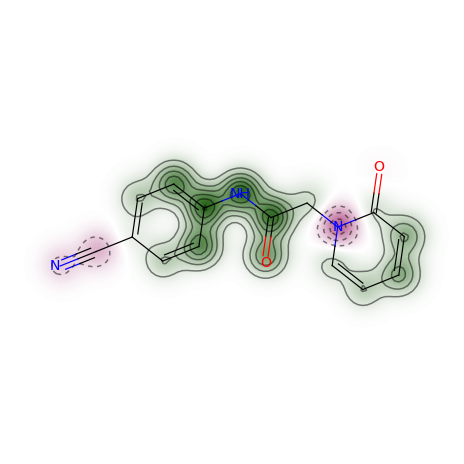

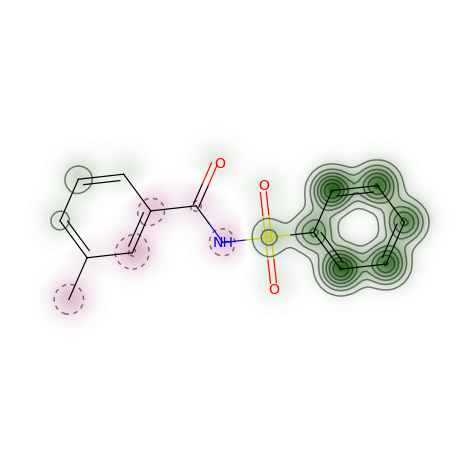

In [34]:
smi_list_A = ["COc1cccc(C(=O)NS(=O)(=O)c2ccccc2)c1","CS(=O)(=O)c1ccc(NS(=O)(=O)c2ccccc2)cc1","Cc1ccc(C(=O)NS(=O)(=O)c2ccccc2)cc1","O=C(CS(=O)(=O)c1ccccc1)Nc1ccccc1"]
smi_list_B = ["N#Cc1ccc(NC(=O)Cn2ccccc2=O)cc1","Cc1cccc(C(=O)NS(=O)(=O)c2ccccc2)c1"]

result = Similarity_heatmap(smi_list_A,smi_list_B,
                            select_fp_type ='Morgan',
                            select_Similarity_index=0,
                            radius=2, fpSize=2048)
result

In [ ]:
a = Chem.MolFromSmiles(smi_list_A[1])
b = Chem.MolFromSmiles(smi_list_B[0])
fig = Similarity_molMap(a,b,fp_type=0,
                        smilarity_type=6,
                        size=(250, 250))
fig.savefig("F:\manuscript3\中文期刊\相似性figs\example.png",
            dpi=600,
            bbox_inches = 'tight')
fig.show()

In [ ]:
run1 = similarity_plots(smi_list_A,smi_list_B)
run1.draw_similarity()


In [45]:
mat = run1.similarity_matrix
aa = mat["N#Cc1ccc(NC(=O)Cn2ccccc2=O)cc1"].sort_values(ascending=False)
aa


O=C(CS(=O)(=O)c1ccccc1)Nc1ccccc1          0.306122
CS(=O)(=O)c1ccc(NS(=O)(=O)c2ccccc2)cc1    0.166667
COc1cccc(C(=O)NS(=O)(=O)c2ccccc2)c1       0.161290
Cc1ccc(C(=O)NS(=O)(=O)c2ccccc2)cc1        0.157895
Name: N#Cc1ccc(NC(=O)Cn2ccccc2=O)cc1, dtype: float64

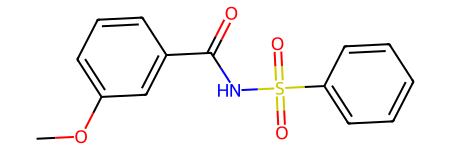

In [73]:
Chem.MolFromSmiles(B_mols["SMILES"][0])